In [ ]:
!pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
#philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 0 ns, sys: 69 µs, total: 69 µs
Wall time: 78 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
#%%time

#matmul(a, b)

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul(a, b)

CPU times: user 0 ns, sys: 42 µs, total: 42 µs
Wall time: 48.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [5, 4, 4, 6]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-1.9828131708223644

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.29048392871554796, 0.3698296657014494, 0.8939395331397024],
 [0.5249425268646526, 0.8409894095843711, 0.8092087822403987]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)


In [ ]:
%%time
for x in range(10):
  randc = matmul(randa, randb)



CPU times: user 2min 1s, sys: 252 ms, total: 2min 1s
Wall time: 2min 15s


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd
data = {'Language':['Python'],
        'Average Secs':[115/10],
        'Speed Factor':[1]}
avg_exec_df = pd.DataFrame(data)
print(avg_exec_df)

  Language  Average Secs  Speed Factor
0   Python          11.5             1


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import numpy as np

randa = random_matrix(600, 100)
randb = random_matrix(100, 600)


In [ ]:
%%time
for x in range(10):
  result = np.dot(randa, randb)

CPU times: user 285 ms, sys: 126 ms, total: 411 ms
Wall time: 398 ms


In [ ]:
new_data = {'Language': 'Numpy',
            'Average Secs': 0.254/10,
            'Speed Factor': 1}
avg_exec_df = avg_exec_df.append(new_data, ignore_index=True)
print(avg_exec_df)

  Language  Average Secs  Speed Factor
0   Python       11.5000             1
1    Numpy        0.0254             1


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 15.2 ms, sys: 944 µs, total: 16.1 ms
Wall time: 20.1 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 355 µs, sys: 0 ns, total: 355 µs
Wall time: 2.41 ms


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
%%fortran

subroutine random_matrix(n, m, a)
  implicit none
  
  integer, intent(in) :: n, m ! matrix dimensions
  real, intent(out) :: a(n,m) ! output matrix
  integer :: i, j
  
  ! Initialize the random number generator
  call random_seed()
  
  ! Generate the random matrix
  do i = 1, n
     do j = 1, m
        call random_number(a(i,j))
     end do
  end do
  
end subroutine random_matrix

subroutine fortran_matmul(A, B, C)
  implicit none
  
  real, intent(in) :: A(2,2), B(2,2) ! input matrices
  real, intent(out) :: C(2,2) ! output matrix
  integer :: i, j, k
  
  ! Compute the matrix product
  do i = 1, 2
     do j = 1, 2
        C(i,j) = 0.0
        do k = 1, 2
           C(i,j) = C(i,j) + A(i,k)*B(k,j)
        end do
     end do
  end do
  
end subroutine fortran_matmul

In [ ]:
matA =  random_matrix(2, 2)
matB =  random_matrix(2, 2)
print(matA)
print(matB)

[[0.5720066  0.34855467]
 [0.90001893 0.8745572 ]]
[[0.31472707 0.8829886 ]
 [0.5643396  0.00536013]]


**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:

%%fortran

subroutine fortran_matmul(A, B, C)
  implicit none
  
  real, intent(in) :: A(2,2), B(2,2) ! input matrices
  real, intent(out) :: C(2,2) ! output matrix
  integer :: i, j, k
  
  ! Compute the matrix product
  do i = 1, 2
     do j = 1, 2
        C(i,j) = 0.0
        do k = 1, 2
           C(i,j) = C(i,j) + A(i,k)*B(k,j)
        end do
     end do
  end do
  
end subroutine fortran_matmul



**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
result = fortran_matmul(matA, matB)
print(result)

[[0.37672913 0.5069436 ]
 [0.77680755 0.79939413]]


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran

subroutine matmul600(A,B,C)
  implicit none
  integer, parameter :: n = 600, m = 100
  real, intent(in) :: A(n,m), B(m,n)
  real, intent(out) :: C(n,n)
  integer :: i, j, k

  ! perform matrix multiplication
  do i = 1, n
    do j = 1, n
      C(i,j) = 0.0
      do k = 1, m
        C(i,j) = C(i,j) + A(i,k) * B(k,j)
      end do
    end do
  end do

end subroutine matmul600

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
matA = random_matrix(600,100)
matB = random_matrix(100,600)
result = matmul600(matA, matB)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
%%time
for x in range(10):
  result = matmul600(matA,matB)

CPU times: user 459 ms, sys: 4.79 ms, total: 464 ms
Wall time: 465 ms


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
new_data = {'Language': 'Fortran',
            'Average Secs': 0.458/10,
            'Speed Factor': 1}
avg_exec_df = avg_exec_df.append(new_data, ignore_index=True)
print(avg_exec_df)

  Language  Average Secs  Speed Factor
0   Python       11.5000             1
1    Numpy        0.0254             1
2  Fortran        0.0458             1


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmul.c

#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define ROWS_A 600
#define COLS_A 100
#define ROWS_B 100
#define COLS_B 600

int main() {
  int A[ROWS_A][COLS_A];
  int B[ROWS_B][COLS_B];
  int C[ROWS_A][COLS_B];
  int i, j, k;

  // Initialize random seed
  srand(time(NULL));

  // Initialize matrix A with random values
  for (i = 0; i < ROWS_A; i++) {
    for (j = 0; j < COLS_A; j++) {
      A[i][j] = rand() % 10;
    }
  }

  // Initialize matrix B with random values
  for (i = 0; i < ROWS_B; i++) {
    for (j = 0; j < COLS_B; j++) {
      B[i][j] = rand() % 10;
    }
  }

  // Multiply matrices A and B to obtain matrix C
  for (i = 0; i < ROWS_A; i++) {
    for (j = 0; j < COLS_B; j++) {
      C[i][j] = 0;
      for (k = 0; k < COLS_A; k++) {
        C[i][j] += A[i][k] * B[k][j];
      }
      C[i][j] *= 10;
    }
  }

  /* Print the resulting matrix C
  for (i = 0; i < ROWS_A; i++) {
    for (j = 0; j < COLS_B; j++) {
      printf("%d ", C[i][j]);
    }
    printf("\n");
  }
  */
  return 0;
}


Overwriting matmul.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!ls -l

total 52
-rw-r--r-- 1 root root  1025 Feb 26 04:48 matmul.c
-rw-r--r-- 1 root root  1191 Feb 26 01:02 matmul.c++
-rwxr-xr-x 1 root root 16816 Feb 26 01:02 output
-rwxr-xr-x 1 root root 17328 Feb 26 01:02 output++
drwxr-xr-x 1 root root  4096 Feb 23 14:38 sample_data


In [ ]:
%%shell

gcc matmul.c -o output

In [ ]:
%%time
%%shell

./output

CPU times: user 5.43 ms, sys: 15.2 ms, total: 20.7 ms
Wall time: 326 ms


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
new_data = {'Language': 'C',
            'Average Secs': 0.229/10,
            'Speed Factor': 1}
avg_exec_df = avg_exec_df.append(new_data, ignore_index=True)
print(avg_exec_df)

  Language  Average Secs  Speed Factor
0   Python       11.5000             1
1    Numpy        0.0254             1
2  Fortran        0.0458             1
3        C        0.0229             1


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matmul.c++
#include <iostream>
#include <cstdlib>
#include <ctime>

using namespace std;

const int ROWS_A = 600;
const int COLS_A = 100;
const int ROWS_B = 100;
const int COLS_B = 600;

int main() {
    int A[ROWS_A][COLS_A];
    int B[ROWS_B][COLS_B];
    int C[ROWS_A][COLS_B];
    int i, j, k;

    // Initialize random seed
    srand(time(NULL));

    // Initialize matrix A with random values
    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_A; j++) {
            A[i][j] = rand() % 10;
        }
    }

    // Initialize matrix B with random values
    for (i = 0; i < ROWS_B; i++) {
        for (j = 0; j < COLS_B; j++) {
            B[i][j] = rand() % 10;
        }
    }

    // Multiply matrices A and B to obtain matrix C
    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_B; j++) {
            C[i][j] = 0;
            for (k = 0; k < COLS_A; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
            C[i][j] *= 10;
        }
    }

    /* Print the resulting matrix C
    for (i = 0; i < ROWS_A; i++) {
        for (j = 0; j < COLS_B; j++) {
            cout << C[i][j] << " ";
        }
        cout << endl;
    }
    */
    return 0;
}


Overwriting matmul.c++


In [ ]:
!ls -l

total 52
-rw-r--r-- 1 root root  1025 Feb 26 04:48 matmul.c
-rw-r--r-- 1 root root  1191 Feb 26 04:48 matmul.c++
-rwxr-xr-x 1 root root 16816 Feb 26 04:48 output
-rwxr-xr-x 1 root root 17328 Feb 26 01:02 output++
drwxr-xr-x 1 root root  4096 Feb 23 14:38 sample_data


In [ ]:

%%shell

g++ matmul.c++ -o output++

**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
%%shell

./output++

CPU times: user 7.74 ms, sys: 9.15 ms, total: 16.9 ms
Wall time: 221 ms


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
new_data = {'Language': 'C++',
            'Average Secs': 0.224/10,
            'Speed Factor': 1}
avg_exec_df = avg_exec_df.append(new_data, ignore_index=True)
print(avg_exec_df)

  Language  Average Secs  Speed Factor
0   Python       11.5000             1
1    Numpy        0.0254             1
2  Fortran        0.0458             1
3        C        0.0229             1
4      C++        0.0224             1


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!pip install jupyter-console
!python3 -m install --user ijava
!python3 -m ijava install --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/bin/python3: No module named install
/usr/bin/python3: No module named ijava


In [ ]:
!pip install beakerx
!beakerx install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.8/365.8 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 KB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0

In [ ]:
%java
import java.util.Random;

public class MatrixMultiplication {
    public static void main(String[] args) {
        int[][] A = new int[600][100];
        int[][] B = new int[100][600];
        int[][] C = new int[600][600];
        int i, j, k;

        // Initialize random seed
        Random rand = new Random();

        // Initialize matrix A with random values
        for (i = 0; i < 600; i++) {
            for (j = 0; j < 100; j++) {
                A[i][j] = rand.nextInt(10);
            }
        }

        // Initialize matrix B with random values
        for (i = 0; i < 100; i++) {
            for (j = 0; j < 600; j++) {
                B[i][j] = rand.nextInt(10);
            }
        }

        // Multiply matrices A and B to obtain matrix C
        for (i = 0; i < 600; i++) {
            for (j = 0; j < 600; j++) {
                C[i][j] = 0;
                for (k = 0; k < 100; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
                C[i][j] *= 10;
            }
        }

        // Print the resulting matrix C
        for (i = 0; i < 600; i++) {
            for (j = 0; j < 600; j++) {
                System.out.print(C[i][j] + " ");
            }
            System.out.println();
        }
    }
}


SyntaxError: ignored

**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 27 - Adding Java average execution time to the data frame**

**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
%%js

// Define the dimensions of the matrices
const rowsA = 600;
const colsA = 100;
const rowsB = 100;
const colsB = 600;

// Define the matrices A and B
const A = new Array(rowsA).fill().map(() => new Array(colsA).fill(0));
const B = new Array(rowsB).fill().map(() => new Array(colsB).fill(0));

// Initialize the matrices A and B with random values
for (let i = 0; i < rowsA; i++) {
  for (let j = 0; j < colsA; j++) {
    A[i][j] = Math.random();
  }
}

for (let i = 0; i < rowsB; i++) {
  for (let j = 0; j < colsB; j++) {
    B[i][j] = Math.random();
  }
}

// Define a function to multiply the matrices
function multiply(A, B) {
  const result = new Array(A.length).fill().map(() => new Array(B[0].length).fill(0));
  
  for (let i = 0; i < A.length; i++) {
    for (let j = 0; j < B[0].length; j++) {
      for (let k = 0; k < A[0].length; k++) {
        result[i][j] += A[i][k] * B[k][j];
      }
    }
  }
  
  return result;
}

// Multiply the matrices 10 times
let C = A;
for (let i = 0; i < 10; i++) {
  C = multiply(C, B);
}

// Print the result
console.log(C);


<IPython.core.display.Javascript object>

CPU times: user 4.5 ms, sys: 0 ns, total: 4.5 ms
Wall time: 12.2 ms


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
print(avg_exec_df)


  Language  Average Secs  Speed Factor
0   Python       11.5000             1
1    Numpy        0.0254             1
2  Fortran        0.0458             1
3        C        0.0229             1
4      C++        0.0224             1


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
avg_time = avg_exec_df.groupby('Language')['Average Secs'].mean()
min_avg_time = avg_time.min()
print('Minimum average execution time:', min_avg_time)


Minimum average execution time: 0.0224


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
const_value = min_avg_time  
avg_exec_df['speed_factor'] = avg_exec_df['Average Secs']/const_value
print(avg_exec_df)

  Language  Average Secs  Speed Factor  speed_factor
0   Python       11.5000             1    513.392857
1    Numpy        0.0254             1      1.133929
2  Fortran        0.0458             1      2.044643
3        C        0.0229             1      1.022321
4      C++        0.0224             1      1.000000


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
sorted_df = avg_exec_df.sort_values('Average Secs')
print(sorted_df)

  Language  Average Secs  Speed Factor  speed_factor
4      C++        0.0224             1      1.000000
3        C        0.0229             1      1.022321
1    Numpy        0.0254             1      1.133929
2  Fortran        0.0458             1      2.044643
0   Python       11.5000             1    513.392857


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.58 ms, sys: 2.05 ms, total: 3.63 ms
Wall time: 2.58 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 392 µs, sys: 2 µs, total: 394 µs
Wall time: 2.03 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 218 µs, sys: 8 µs, total: 226 µs
Wall time: 236 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0190855594695478

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100
2010-02-02,27.980000,174585600
2010-02-03,28.461428,153832000
2010-02-04,27.435715,189413000


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

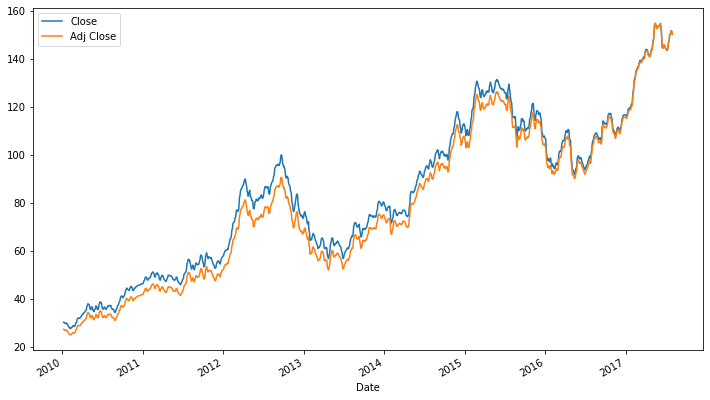

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

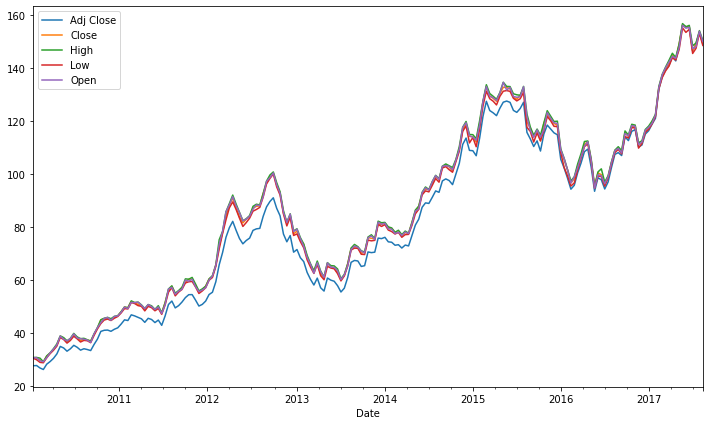

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

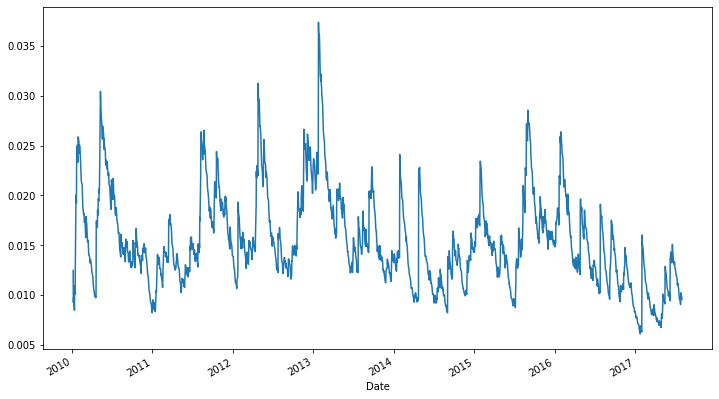

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
#avocados = read_avocadata('2014', '2016')
frame = pd.read_csv('avocado.csv', parse_dates=['Date'], index_col='Date')
frame = frame[frame['Unit'] == 'each']
frame['Organic'] = (frame['Organic'] == 'Y')
frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
#frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

frame['Region'] = frame['Region'].str.replace(' U.S.', '')
frame['Region'] = frame['Region'].str.replace(' ', '_')
frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )
frame.head()

avocados = frame
avocados.head(10)

<ipython-input-237-ada3c3e24fca>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
Date,,,,,,,,,,,,
2022-02-18,NATIONAL,FRUITS,AVOCADOS,HASS,False,NaN,each,"3,579",1.40,NaN,NaN,NaN
2022-02-18,NATIONAL,FRUITS,AVOCADOS,HASS,True,NaN,each,855,1.95,NaN,NaN,NaN
2022-02-18,NATIONAL,FRUITS,AVOCADOS,GREENSKIN,False,NaN,each,502,2.00,NaN,NaN,NaN
2022-02-18,NATIONAL,FRUITS,AVOCADOS,GREENSKIN,True,NaN,each,8,2.00,NaN,NaN,NaN
2022-02-18,NORTHEAST,FRUITS,AVOCADOS,HASS,False,NaN,each,545,1.55,0.88,2.79,NaN
2022-02-18,NORTHEAST,FRUITS,AVOCADOS,GREENSKIN,True,NaN,each,8,2.00,2.00,2.00,NaN
2022-02-18,SOUTHEAST,FRUITS,AVOCADOS,HASS,False,NaN,each,406,2.19,0.88,2.79,NaN
2022-02-18,SOUTHEAST,FRUITS,AVOCADOS,HASS,True,NaN,each,82,2.00,2.00,2.00,NaN
2022-02-18,SOUTHEAST,FRUITS,AVOCADOS,GREENSKIN,False,NaN,each,453,2.00,2.00,2.00,NaN


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Region                 object
Class                  object
Commodity              object
Variety                object
Organic                  bool
Environment           float64
Unit                   object
Number of Stores       object
Weighted Avg Price    float64
Low Price             float64
High Price            float64
% Marked Local        float64
dtype: object

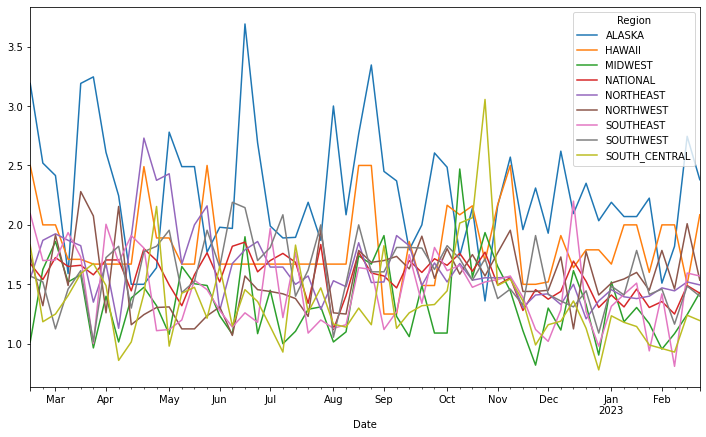

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
#organic_spread_by_region(hass).plot();
#plt.gca().set_title("Daily Regional Organic Spread");
#plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
#spread_correlation = organic_spread_by_region(hass).corr()
#spread_correlation

In [ ]:
import seaborn as sns
#grid = sns.clustermap(spread_correlation, annot=True)
#fig = grid.fig
#axes = fig.axes
#ax = axes[2]
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!